In [1]:
import os
os.chdir("/Users/sahanalva/Documents/GitHub/CTGAN/ctgan")

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import synthesizer,transformer,sampler,conditional,models

In [3]:
model = torch.load("/Users/sahanalva/Counterfactual Research/big.pt")

In [4]:
data = pd.read_csv("/Users/sahanalva/Counterfactual Research/data_big.csv")

In [184]:
data.head()

,Unnamed: 0,applicant_sex,applicant_sex_name,agency_abbr,agency_name,applicant_income_000s,number_of_1_to_4_family_units,population
0,0,3,Not Provided,NCUA,National Credit Union Administration,38.0,2271.0,4272.0
1,1,2,Female,NCUA,National Credit Union Administration,73.0,1814.0,5451.0
2,2,3,Not Provided,CFPB,Consumer Financial Protection Bureau,278.0,1105.0,3372.0
3,3,1,Male,HUD,Department of Housing and Urban Development,119.0,3782.0,12551.0
4,4,3,Not Provided,CFPB,Consumer Financial Protection Bureau,181.0,742.0,3755.0


In [58]:
sampled = model.sample(n= len(data), col_index= 3)


3.1317, grad_fn=<DivBackward0>)
tensor(3.5345, grad_fn=<DivBackward0>)
tensor(3.2004, grad_fn=<DivBackward0>)
tensor(3.3156, grad_fn=<DivBackward0>)
tensor(3.5356, grad_fn=<DivBackward0>)
tensor(3.4212, grad_fn=<DivBackward0>)
tensor(3.1606, grad_fn=<DivBackward0>)
tensor(3.3590, grad_fn=<DivBackward0>)
tensor(3.4015, grad_fn=<DivBackward0>)
tensor(3.1720, grad_fn=<DivBackward0>)
tensor(3.2156, grad_fn=<DivBackward0>)
tensor(3.1900, grad_fn=<DivBackward0>)
tensor(3.6061, grad_fn=<DivBackward0>)
tensor(3.2269, grad_fn=<DivBackward0>)
tensor(3.2663, grad_fn=<DivBackward0>)
tensor(3.1825, grad_fn=<DivBackward0>)
tensor(3.3380, grad_fn=<DivBackward0>)
tensor(3.2717, grad_fn=<DivBackward0>)
tensor(3.3970, grad_fn=<DivBackward0>)
tensor(3.5476, grad_fn=<DivBackward0>)
tensor(3.1394, grad_fn=<DivBackward0>)
tensor(3.1557, grad_fn=<DivBackward0>)
tensor(3.2130, grad_fn=<DivBackward0>)
tensor(3.6149, grad_fn=<DivBackward0>)
tensor(3.5938, grad_fn=<DivBackward0>)
tensor(3.1887, grad_fn=<DivBackw

In [59]:
sampled.head()

,applicant_sex,applicant_sex_name,agency_abbr,agency_name,applicant_income_000s,number_of_1_to_4_family_units,population
0,4,Not applicable,FDIC,Federal Deposit Insurance Corporation,-19.441372,777.802296,3269.024424
1,4,Not applicable,FDIC,Federal Deposit Insurance Corporation,14.691878,1221.939804,3641.005841
2,4,Not applicable,FDIC,Federal Deposit Insurance Corporation,15.964335,1785.568268,5571.810392
3,4,Not applicable,FDIC,Federal Deposit Insurance Corporation,46.835434,1383.273440,1796.128188
4,4,Not applicable,FDIC,Federal Deposit Insurance Corporation,21.451646,1153.748666,3593.179964


In [60]:
sampled["applicant_sex_name"][sampled.applicant_sex_name == "Information not provided by applicant in mail, Internet, or telephone application"] = "Not Provided"
data["applicant_sex_name"][data.applicant_sex_name == "Information not provided by applicant in mail, Internet, or telephone application"] = "Not Provided"

In [61]:
agency_abbr_col_reindex = np.array(["CFPB", "HUD", "FDIC", "FRS", "NCUA", "OCC"])
applicant_sex_col_reindex = np.array([2, 1, 3,4])


In [65]:
feature1 = 'applicant_sex_name'
feature2 = 'applicant_sex'
col_reindex = applicant_sex_col_reindex

In [66]:
calculate_contingency_table(data, feature1, feature2)

applicant_sex,1,2,3,4,Total
applicant_sex_name,,,,,
Female,0.00,28.78,0.00,0.00,28.78
Male,62.51,0.00,0.00,0.00,62.51
Not Provided,0.00,0.00,8.64,0.00,8.64
Not applicable,0.00,0.00,0.00,0.07,0.07
Total,62.51,28.78,8.64,0.07,100.00


In [67]:
calculate_contingency_table(sampled, feature1, feature2)

applicant_sex,1,2,3,4,Total
applicant_sex_name,,,,,
Female,0.00,0.00,0.00,0.74,0.74
Male,0.00,0.00,0.00,1.11,1.11
Not Provided,0.00,0.00,0.00,0.77,0.77
Not applicable,0.06,0.04,0.02,97.26,97.38
Total,0.07,0.04,0.02,99.87,100.00


In [191]:
feature1 = 'applicant_sex_name'
feature2 = 'agency_abbr'
col_reindex = None

In [11]:
def calculate_contingency_table(data, feature1, feature2, col_reindex = None):
    og = (pd.crosstab(data[feature1], data[feature2])/data.shape[0] * 100)
    if col_reindex != None:
        og = og.reindex(col_reindex, axis="columns")
    og['Total'] = og.sum(axis=1)
    og.loc['Total']= og.sum()
    og = og.round(2)
    return og

In [12]:
def plot_conditional_density_graph(data, sampled, categorical_feature, condition, continous_feature, limit):

    data = data[data[categorical_feature] == condition]
    sampled = sampled[sampled[categorical_feature] == condition]
    
    sns.displot(sampled, x=continous_feature, hue=categorical_feature, kind = "kde", fill = True, cut = 0)
    plt.xlim(0, limit)
    sns.displot(data, x=continous_feature, hue=categorical_feature, kind = "kde",  fill = True)
    plt.xlim(0, limit)

    plt.show()

In [13]:
categorical_feature = 'applicant_sex_name'
condition = "Female"
continous_feature = 'number_of_1_to_4_family_units'
limit = 10000

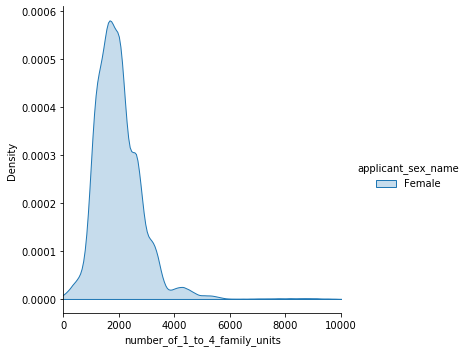

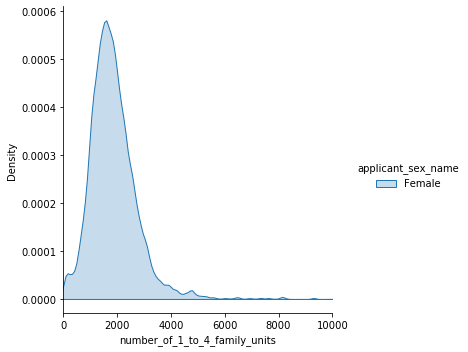

In [183]:

plot_conditional_density_graph(data, sampled, categorical_feature, condition, continous_feature, limit)